In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

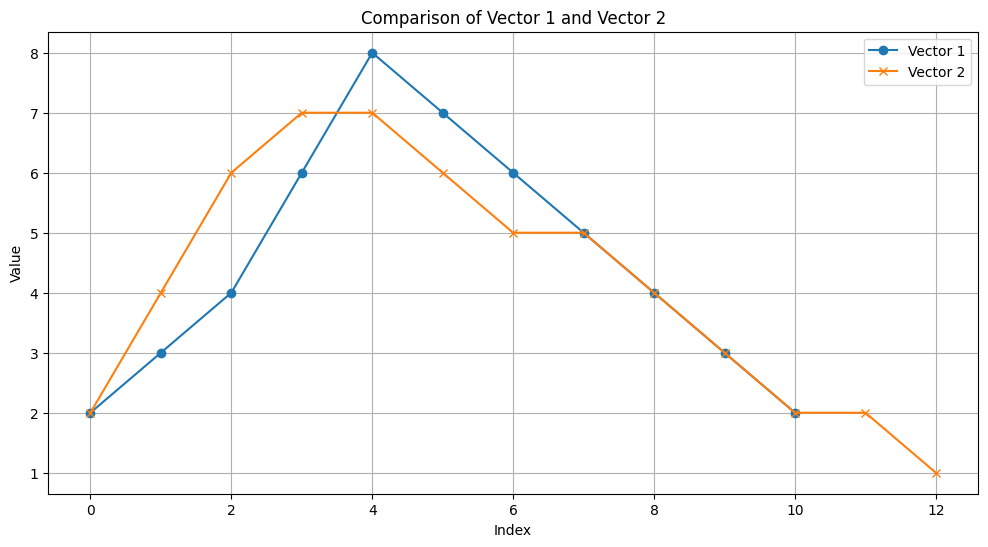

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(vector_1, label="Vector 1", marker='o')
plt.plot(vector_2, label="Vector 2", marker='x')
plt.title("Comparison of Vector 1 and Vector 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

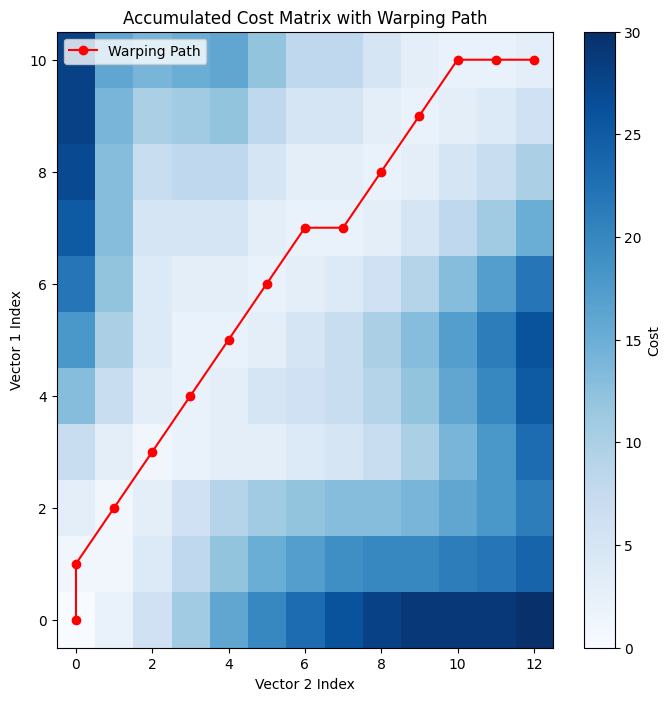

DTW Distance: 3.0
Warping Path: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12)]


In [ ]:
def dtw(vector_1, vector_2):
    n, m = len(vector_1), len(vector_2)
    cost_matrix = np.zeros((n, m))

    # Compute cost matrix
    for i in range(n):
        for j in range(m):
            cost_matrix[i, j] = abs(vector_1[i] - vector_2[j])

    # Compute accumulated cost matrix
    acc_cost_matrix = np.zeros_like(cost_matrix)
    acc_cost_matrix[0, 0] = cost_matrix[0, 0]

    for i in range(1, n):
        acc_cost_matrix[i, 0] = acc_cost_matrix[i-1, 0] + cost_matrix[i, 0]
    for j in range(1, m):
        acc_cost_matrix[0, j] = acc_cost_matrix[0, j-1] + cost_matrix[0, j]

    for i in range(1, n):
        for j in range(1, m):
            acc_cost_matrix[i, j] = cost_matrix[i, j] + min(
                acc_cost_matrix[i-1, j],   # insertion
                acc_cost_matrix[i, j-1],   # deletion
                acc_cost_matrix[i-1, j-1]  # match
            )

    # Find the warping path
    i, j = n-1, m-1
    path = [(i, j)]
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_cost = min(acc_cost_matrix[i-1, j], acc_cost_matrix[i, j-1], acc_cost_matrix[i-1, j-1])
            if min_cost == acc_cost_matrix[i-1, j-1]:
                i, j = i-1, j-1
            elif min_cost == acc_cost_matrix[i-1, j]:
                i -= 1
            else:
                j -= 1
        path.append((i, j))
    path.reverse()
    return acc_cost_matrix, path

# (c) Compute the accumulated cost matrix
acc_cost_matrix, warping_path = dtw(vector_1, vector_2)

# (d) Visualize the warping path
plt.figure(figsize=(8, 8))
plt.imshow(acc_cost_matrix, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label='Cost')
path_x, path_y = zip(*warping_path)
plt.plot(path_y, path_x, marker='o', color='red', label='Warping Path')
plt.title("Accumulated Cost Matrix with Warping Path")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
plt.legend()
plt.show()

# (e) DTW distance
dtw_distance = acc_cost_matrix[-1, -1]

# Print results
print("DTW Distance:", dtw_distance)
print("Warping Path:", warping_path)